In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 16.6 s, sys: 1.38 s, total: 18 s
Wall time: 19.3 s


CPU times: user 30.4 s, sys: 1.52 s, total: 31.9 s
Wall time: 34.8 s


(<Figure size 300x800 with 5 Axes>, <GeoAxes: >)

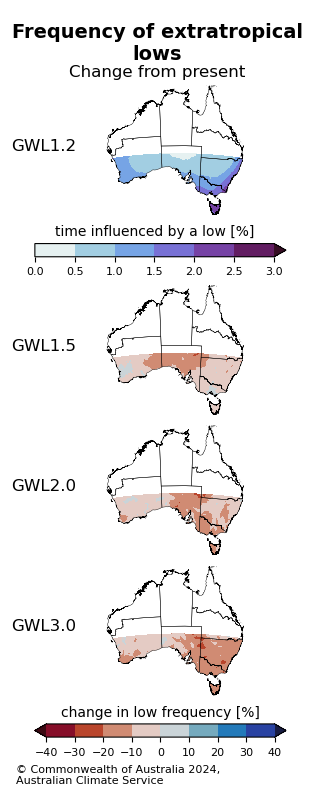

In [3]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12.where(ds_gwl12["lat"]<=-28),
                       ds_gwl15=ds_gwl15.where(ds_gwl15["lat"]<=-28),
                       ds_gwl20=ds_gwl20.where(ds_gwl20["lat"]<=-28),
                       ds_gwl30=ds_gwl30.where(ds_gwl30["lat"]<=-28),
                       title = "Frequency of extratropical lows",
                       date_range="Change from present",
                       cmap = cmap_dict["xts_freq_anom"],
                       ticks = np.arange(-40,41,10),
                       cbar_label = "change in low frequency [%]",
                       cbar_extend="both",
                       watermark="",
                       gwl12_cmap=cmap_dict["xts_freq"],
                       gwl12_cbar_extend= "max",
                       gwl12_cbar_label= "time influenced by a low [%]",
                       gwl12_ticks= np.arange(0,3.1, 0.5),
                       orientation="vertical",
                       cmap_bad="w",
                       issued_date="",
                       tick_rotation=0,
                       )

In [4]:
# You may also like to apply a custom mask to the stats function
# using "clipped" to only select by a lat lon box around regions mask:

import geopandas as gpd
from glob import glob
from shapely.geometry import box
import regionmask
import xarray as xr
from acs_area_statistics import acs_regional_stats, get_regions

# get the shapefile for australia
PATH = "/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data"
shapefile = "australia"
gdf = gpd.read_file(glob(f"{PATH}/{shapefile}/*.shp")[0]).to_crs("EPSG:4326")

# set your limits
# box(xmin, ymin, xmax, ymax)
clipped = gdf.clip( box(100, -45, 160, -30))

# need some data
filename = "/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_GWL12.nc"
ds = xr.open_dataset(filename, use_cftime = True,)


(<Figure size 600x450 with 2 Axes>, <GeoAxes: >)

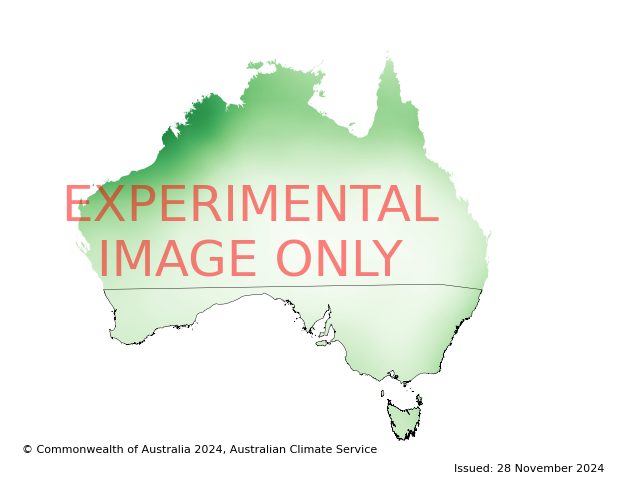

In [5]:
var="low_freq"
plot_acs_hazard(data=ds[var],
                regions=clipped,
               )

In [6]:
regions = regionmask.from_geopandas(clipped, name= "clipped_shapefile", overlap=True) 

mask = regions.mask_3D(ds)

# then calculate the stats for this clipped region
dims = ("lat", "lon",)

df_summary = acs_regional_stats(ds=ds,var=var, mask=mask, dims = dims, how = ["min", "median", "max"])
df_summary


<xarray.Dataset> Size: 60B
Dimensions:          (region: 1)
Coordinates:
  * region           (region) int64 8B 0
    abbrevs          (region) <U2 8B 'r0'
    names            (region) <U7 28B 'Region0'
Data variables:
    low_freq_min     (region) float32 4B 0.4409
    low_freq_median  float64 8B 0.9763
    low_freq_max     (region) float32 4B 2.052

(<Figure size 600x450 with 2 Axes>, <GeoAxes: >)

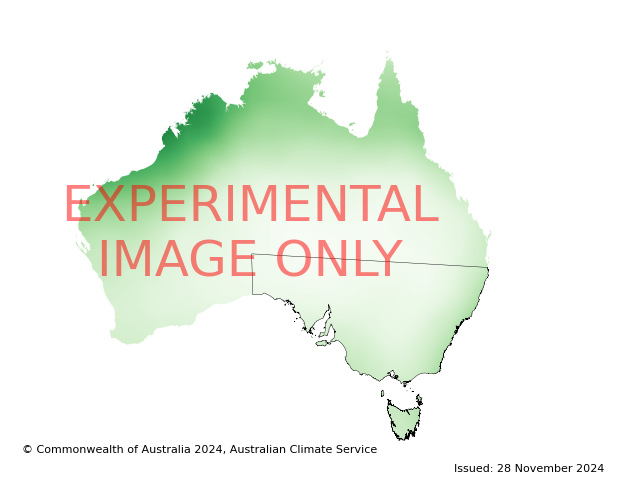

In [7]:
# another example showing the clipping
clipped = gdf.clip( box(130, -45, 160, -28))

plot_acs_hazard(data=ds[var],
                regions=clipped,
               )